M= 27 dunn ind= 0.00017263349150062197


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


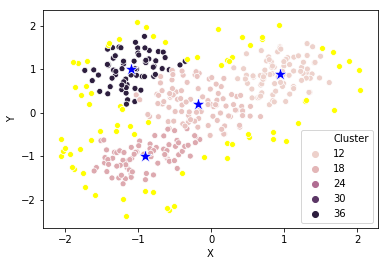

In [39]:
import pandas as pd
import numpy as np
import scipy.spatial
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns


def dunn_ind(df):
    distance_centr = euclidean_distances(df.groupby(['Cluster']).mean(), df.groupby(['Cluster']).mean())
    distance_array = df.groupby(['Cluster']).apply(lambda x: euclidean_distances(x, x))
    dist_max = []
    for i in range(len(distance_array)):
        dist_max.append(np.max(distance_array.iloc[i]))
    dunn_index = np.min(distance_centr[np.nonzero(distance_centr)]) / np.max(dist_max)
    return dunn_index


def dbscan(df, df_tree, df_origin, eps, M):
    df = df.copy()
    m = 0
    for i in range(df.shape[0]):
        if len(df_tree.query_ball_point(df_origin.iloc[i], r=eps)) >= M:
            df['Cluster'].iloc[df_tree.query_ball_point(df_origin.iloc[i], r=eps)] = df['Cluster'].iloc[i]
#             print('query ball /n', df['Cluster'].iloc[df_tree.query_ball_point(df_origin.iloc[i], r = eps)], 'df_b Cluster',df['Cluster'].iloc[i])


    centers = df.groupby(['Cluster']).mean()
    number = df.groupby(['Cluster']).count()
    #     print('centers', centers)
    #     print('number', number)
    # print('neib', neighbors)
    # print('visit', df_visited)

    temp = []
    for i in range(number.shape[0]):
        if number['X'].iloc[i] >= M:
            temp.append(number.index[i])

    df_clu = df.loc[df['Cluster'].isin(temp)]
    df_outl = df.loc[~df['Cluster'].isin(temp)]

    cntr = centers.loc[temp]

    return df, df_clu, df_outl, cntr

dunn = dunn_ind(df)
print('M=', M, 'dunn ind=', dunn)


eps = 0.4
M = 27
df = pd.read_csv('/Users/alena_paliakova/Google Drive/!Bioinf_drive/02_MachinLearn/HW2/blobs.csv')
df_tree = scipy.spatial.KDTree(df)

df_col = pd.DataFrame({'Cluster': np.array(list(range(df.shape[0])), dtype = int)})
df = df.join(df_col)

df_origin = df.copy
df_origin = df.drop(columns=['Cluster'])

ax = sns.scatterplot(x="X", y="Y", data=dbscan(df, df_tree, df_origin, eps, M)[1], hue="Cluster")
ax = sns.scatterplot(x="X", y="Y", data=dbscan(df, df_tree, df_origin, eps, M)[3], color='blue', s=200,
                     marker='*')
ax = sns.scatterplot(x="X", y="Y", data=dbscan(df, df_tree, df_origin, eps, M)[2], color='yellow')
